In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [34]:
dataset = pd.read_csv('stock_market.csv')
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-01,494.5,502.500000,493.000000,498.700012,415.561249,6880852.0
1,2015-07-02,499.5,500.700012,492.524994,494.000000,411.644745,4007568.0
2,2015-07-03,494.0,496.500000,491.000000,495.149994,412.603058,2695306.0
3,2015-07-06,492.5,494.000000,487.500000,491.649994,409.686493,4305602.0
4,2015-07-07,492.5,495.000000,489.500000,490.250000,408.519897,3497418.0


In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1228 entries, 0 to 1227
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1228 non-null   object 
 1   Open       1227 non-null   float64
 2   High       1227 non-null   float64
 3   Low        1227 non-null   float64
 4   Close      1227 non-null   float64
 5   Adj Close  1227 non-null   float64
 6   Volume     1227 non-null   float64
dtypes: float64(6), object(1)
memory usage: 67.3+ KB


In [36]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1.227000e+03
mean,605.359984,611.994194,598.518723,605.161715,557.417386,8.675740e+06
std,103.981567,105.130168,103.068678,104.111674,118.345056,7.941786e+06
min,440.000000,443.799988,430.000000,436.700012,390.604187,7.589560e+05
25%,514.187500,519.762482,509.349991,513.974976,451.269745,5.361510e+06
50%,586.025024,592.450012,580.000000,585.950012,517.107422,7.023516e+06
75%,704.924988,711.725006,695.975006,704.262512,676.590088,9.551616e+06
max,843.299988,847.000000,835.049988,840.150024,810.035217,1.644050e+08


## Data Cleaning

In [37]:
dataset.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [38]:
open_null = dataset[dataset['Open'].isnull()]
print(open_null)

            Date  Open  High  Low  Close  Adj Close  Volume
1062  2019-10-27   NaN   NaN  NaN    NaN        NaN     NaN


In [39]:
null_rows = dataset[dataset.isnull().any(axis=1)]
print(null_rows)


            Date  Open  High  Low  Close  Adj Close  Volume
1062  2019-10-27   NaN   NaN  NaN    NaN        NaN     NaN


In [40]:
## removes all rows where any column has a null value.
dataset = dataset.dropna()

In [41]:
print(dataset.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [42]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1227 entries, 0 to 1227
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1227 non-null   object 
 1   Open       1227 non-null   float64
 2   High       1227 non-null   float64
 3   Low        1227 non-null   float64
 4   Close      1227 non-null   float64
 5   Adj Close  1227 non-null   float64
 6   Volume     1227 non-null   float64
dtypes: float64(6), object(1)
memory usage: 76.7+ KB


In [43]:
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [44]:
print(dataset.dtypes)

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object


In [45]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-01,494.5,502.500000,493.000000,498.700012,415.561249,6880852.0
1,2015-07-02,499.5,500.700012,492.524994,494.000000,411.644745,4007568.0
2,2015-07-03,494.0,496.500000,491.000000,495.149994,412.603058,2695306.0
3,2015-07-06,492.5,494.000000,487.500000,491.649994,409.686493,4305602.0
4,2015-07-07,492.5,495.000000,489.500000,490.250000,408.519897,3497418.0


In [48]:
## Divide our dataset into independent and dependent features
X = dataset[['Open', 'High', 'Low', 'Adj Close', 'Volume']]  # Independent features
y = dataset['Close']  # Dependent feature (target)

In [51]:
dataset.corr()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,1.000000,0.722976,0.728840,0.721791,0.725172,0.837877,0.108736
Open,0.722976,1.000000,0.997572,0.997784,0.996078,0.978797,-0.023182
High,0.728840,0.997572,1.000000,0.996728,0.998286,0.981826,-0.006771
Low,0.721791,0.997784,0.996728,1.000000,0.998231,0.980475,-0.050253
Close,0.725172,0.996078,0.998286,0.998231,1.000000,0.982597,-0.032157
Adj Close,0.837877,0.978797,0.981826,0.980475,0.982597,1.000000,0.002454
Volume,0.108736,-0.023182,-0.006771,-0.050253,-0.032157,0.002454,1.000000


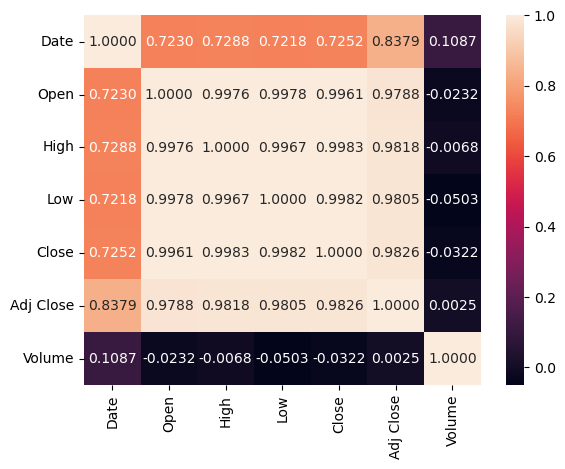

In [60]:
sns.heatmap(dataset.corr(), annot=True, fmt='.4f')
plt.show()

## Train Test Split

In [61]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

In [64]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((822, 5), (822,), (405, 5), (405,))

## Model Training

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
regression = LinearRegression()

In [71]:
regression.fit(X_train, y_train)

LinearRegression()

In [72]:
## Slope or Coefficient
regression.coef_

array([-4.96236636e-01,  7.08932777e-01,  7.63063492e-01,  2.15666748e-02,
        3.98011935e-09])

In [73]:
## Intercept
regression.intercept_

3.0152725789416763

In [74]:
## Prediction for the test data
y_pred = regression.predict(X_test)
y_pred

array([795.57805304, 517.74507497, 696.28435274, 515.06055483,
       539.84194545, 566.47710454, 485.80502422, 550.84277172,
       484.61219147, 518.29533236, 610.22709365, 537.6573574 ,
       635.89762933, 675.66771388, 546.81105861, 491.66446191,
       736.16742013, 522.64367753, 584.33484537, 568.2232806 ,
       601.69534491, 694.71865791, 546.58584374, 483.27545462,
       729.25955555, 755.29847629, 690.95923924, 729.87578534,
       531.23211649, 738.9547772 , 494.28646299, 707.07691342,
       625.79717255, 478.38648102, 619.32808239, 447.47816938,
       623.42843819, 827.27045959, 469.00665125, 561.4759261 ,
       466.48157554, 565.0527878 , 647.03792711, 718.97309406,
       466.89054094, 452.42683626, 690.09512593, 578.18675301,
       738.43464257, 550.29334715, 747.9825078 , 490.572214  ,
       499.19331967, 495.92487569, 596.41380378, 651.46029338,
       720.67188991, 585.93532051, 708.07602826, 755.12722446,
       690.06805765, 465.08657549, 793.53355568, 526.53

In [75]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))
      

14.636554554435062
2.4829223102736893
3.825775026636441


In [76]:
## R squate and adjusted R square

from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)

0.9986196924286175


In [77]:
# display adjusted R-squared
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.9986023953412568

## Assumption

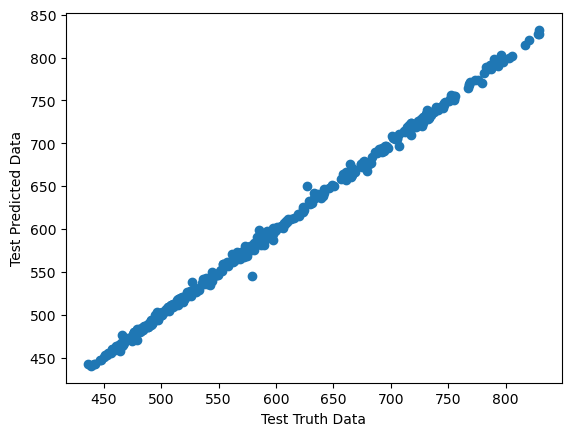

In [78]:
plt.scatter(y_test, y_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")
plt.show()

In [79]:
residuals = y_test - y_pred

In [80]:
residuals

1046   -2.028065
289     1.029949
1068   -0.184377
290     0.864433
101     4.108067
          ...   
213     0.130679
120     0.348235
590    -1.718385
478     5.501888
545    -0.630623
Name: Close, Length: 405, dtype: float64

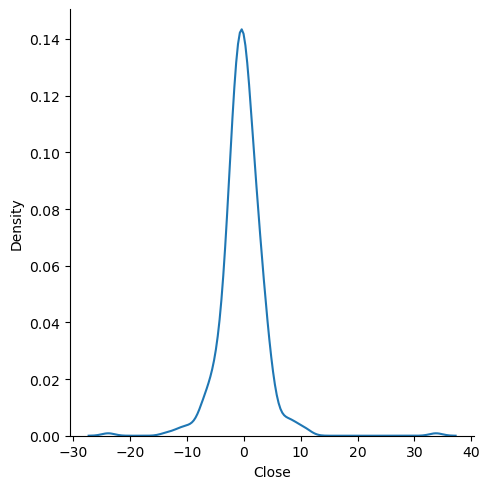

In [81]:
sns.displot(residuals, kind="kde")
plt.show()

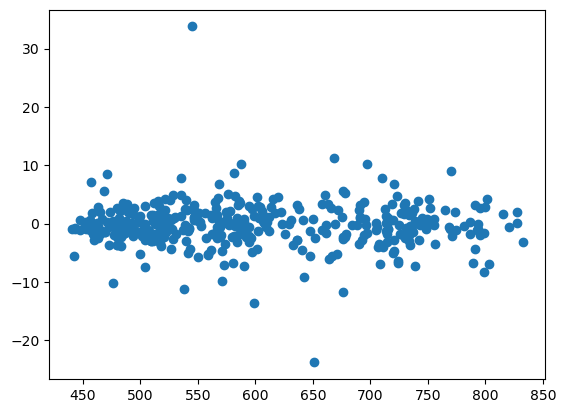

In [82]:
## Scatter plot with prediction and residual
## uniform distribution
plt.scatter(y_pred, residuals,)
plt.show()

In [85]:
## Pickling
import pickle
pickle.dump(regression, open('stock_market.pkl', 'wb'))

In [86]:
pickle.load(open('stock_market.pkl', 'rb'))

LinearRegression()

In [89]:
regression.predict(X_test)

array([795.57805304, 517.74507497, 696.28435274, 515.06055483,
       539.84194545, 566.47710454, 485.80502422, 550.84277172,
       484.61219147, 518.29533236, 610.22709365, 537.6573574 ,
       635.89762933, 675.66771388, 546.81105861, 491.66446191,
       736.16742013, 522.64367753, 584.33484537, 568.2232806 ,
       601.69534491, 694.71865791, 546.58584374, 483.27545462,
       729.25955555, 755.29847629, 690.95923924, 729.87578534,
       531.23211649, 738.9547772 , 494.28646299, 707.07691342,
       625.79717255, 478.38648102, 619.32808239, 447.47816938,
       623.42843819, 827.27045959, 469.00665125, 561.4759261 ,
       466.48157554, 565.0527878 , 647.03792711, 718.97309406,
       466.89054094, 452.42683626, 690.09512593, 578.18675301,
       738.43464257, 550.29334715, 747.9825078 , 490.572214  ,
       499.19331967, 495.92487569, 596.41380378, 651.46029338,
       720.67188991, 585.93532051, 708.07602826, 755.12722446,
       690.06805765, 465.08657549, 793.53355568, 526.53